# <center> Finding a restaurant in Berlin </center>
### <center> November 2020 </center>


## 1. Capstone Project - The Battle of the Neighborhoods
### 1.1 Introduction
Home to more than 3.7 million in the city itself and about 6 million within the local region, Berlin is Germany's largest city and eighth European travel destinations (and is at first place in Germany). Besides that, recently the city has become the fastest-growing start-up hub in Germany. The capital is particularly attractive to new businesses in the creative and technology industries. Because of that, many people came and go to the city to deal about business and have no time to discover the many beauties of it. The idea here is trying to find a solution to enjoy the city’s main attractions, such as historical places and local food, for people who has small time and strong desire to know it.
### 1.2 Problem
The current problem is a very common issue for consultants and other people who work traveling (at least, before COVID-19 epidemic): the opportunity to know new places because of work but the small time available to enjoy it. This problem brings a man who are in a business travel to Berlin and has only two days in the city. Due to his busy agenda, he will not have the opportunity to explore the city. Because of that, he chose a hotel close to Brandenburg Gate, Hotels by HR, in order to visit at least this place. He also would like to eat in a local restaurant near to that in order to enjoy a typical Berliner lunch. Since the city has many options, the objective here is trying to find the better one, considering the man’s requirements. 

## 2. Data Acquisition and Cleaning
### 2.1 Data Source
Based on the problem defined above, the data will come from two main sources: Foursquare API and Google Maps API. The exploratory study below will show how many restaurants are in the Brandenburg Gate’s neighborhood, how many restaurants of each type (German food, Italian food, Arabian food, etc.) and the distance from the touristic sight.

To proceeed with this analysis, I will first install the necessary Python libraries in my notebook. 

In [5]:
import numpy as np
import pandas as pd
import json # library to handle JSON files
import requests # library to handle requests

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('')
print('Libraries imported.')

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.9.1
  latest version: 4.9.2

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.11.8  |       ha878542_0         145 KB  conda-forge
    certifi-2020.11.8          |   py36h5fab9bb_0         150 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-2.0.0                |     pyh9f0ad1d_0          63 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         392 KB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch



To access Foursquare API, I must provide my credentials, as exposed below

In [6]:
#Insert credentials of Foursquare Dev Account
CLIENT_ID = 'SC3NKWNX53DVRT1MC1HX3MCMO5WZLUIEL0PGNPE2CSU1J551'
CLIENT_SECRET = '1J4DWUEA2CDAOG0F24VLOX4ADM0ZP4N1XWPUINVSZONRJPRA'
VERSION = '20190530' # Foursquare API version
print('Credentials accepted')

Credentials accepted


After that, I will collect the Berlin latitude and longitude to return the restaurant information I need. After that, I will cross this data with Brandeburg Gate location, defining it as the geolocator in my model.

In [97]:
# Get longitude and latitude for Berlin
address = 'Brandenburg Gate, Berlin, Germany'
geolocator = Nominatim(user_agent="berlin")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
search_query = 'Restaurant'
radius = 1000
LIMIT = 100
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url
results = requests.get(url).json()

# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:18: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead


,id,name,categories,referralId,hasPerk,location.address,location.crossStreet,location.lat,location.lng,location.labeledLatLngs,location.distance,location.postalCode,location.cc,location.city,location.state,location.country,location.formattedAddress,venuePage.id,location.neighborhood
0,4adcda88f964a520574921e3,Restaurant Quarré,"[{'id': '4bf58dd8d48988d1c4941735', 'name': 'R...",v-1606080550,False,Unter den Linden 77,Pariser Platz,52.516016,13.379910,"[{'label': 'display', 'lat': 52.51601581545151...",152,10117,DE,Berlin,Berlin,Deutschland,"[Unter den Linden 77 (Pariser Platz), 10117 Be...",126425485,NaN
1,5aa6c6c6a22db77cd6ff85bd,Restaurant 1687,"[{'id': '4bf58dd8d48988d10c941735', 'name': 'F...",v-1606080550,False,Mittelstr. 30,Neustädtischer Kirchplatz,52.517975,13.384530,"[{'label': 'display', 'lat': 52.51797507680307...",499,10117,DE,Berlin,Berlin,Deutschland,"[Mittelstr. 30 (Neustädtischer Kirchplatz), 10...",NaN,NaN
2,4adcda88f964a5207c4921e3,Dachgarten-Restaurant,"[{'id': '4bf58dd8d48988d10d941735', 'name': 'G...",v-1606080550,False,Platz der Republik 1,Im Deutschen Bundestag,52.518628,13.376118,"[{'label': 'display', 'lat': 52.5186283, 'lng'...",282,11011,DE,Berlin,Berlin,Deutschland,[Platz der Republik 1 (Im Deutschen Bundestag)...,453784891,NaN
3,4d30b1aca241f04d61efb627,Samadhi Vegetarisches Restaurant,"[{'id': '4bf58dd8d48988d1d3941735', 'name': 'V...",v-1606080550,False,Wilhelmstr. 77,Behrenstr.,52.514680,13.381596,"[{'label': 'display', 'lat': 52.51467966064701...",318,10117,DE,Berlin,Berlin,Deutschland,"[Wilhelmstr. 77 (Behrenstr.), 10117 Berlin, De...",531566796,NaN
4,5c3e3e09bb8d36002ce3413a,Restaurant Galerie,"[{'id': '4bf58dd8d48988d1c4941735', 'name': 'R...",v-1606080550,False,Friedrichstraße 151,NaN,52.518499,13.388497,"[{'label': 'display', 'lat': 52.518499, 'lng':...",771,10117,DE,Berlin,Berlin,Deutschland,"[Friedrichstraße 151, 10117 Berlin, Deutschland]",NaN,NaN


In [126]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]
df = dataframe_filtered.drop(columns=['id','lat', 'lng', 'labeledLatLngs', 'cc', 'state', 'country','formattedAddress','postalCode','crossStreet','neighborhood'])

df.head()

#df2['percent']= df2['distance']/50
#df2.head(100).sort_values(by=['distance'], ascending=False)

,name,categories,address,distance,city
0,Restaurant Quarré,Restaurant,Unter den Linden 77,152,Berlin
1,Restaurant 1687,French Restaurant,Mittelstr. 30,499,Berlin
2,Dachgarten-Restaurant,German Restaurant,Platz der Republik 1,282,Berlin
3,Samadhi Vegetarisches Restaurant,Vegetarian / Vegan Restaurant,Wilhelmstr. 77,318,Berlin
4,Restaurant Galerie,Restaurant,Friedrichstraße 151,771,Berlin


#### 2.2 Display information

Before to select the better location, we can explore better the data collected. First of all, let see a chart by categories. Due to Foursquare API limitation, the model will collect only 50 rows but this will be sufficient to do the analysis.

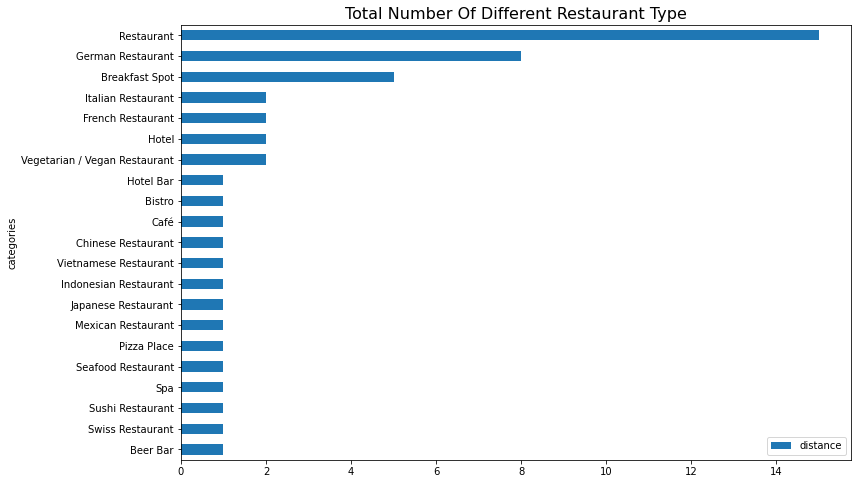

In [239]:
from matplotlib import pyplot as plt

df2 = df.pivot_table(index=['categories'], values=['distance'], aggfunc='count')
df2.sort_values(by=['distance']).plot(kind="barh", figsize=(12, 8))
plt.title("Total Number Of Different Restaurant Type", loc="center", fontsize=16)
plt.show()

The segmentation above could help us to see the possible options for our case. Unfortunately, the categories are very pulverized and do not add more than that for our analyis. However, we can try to see another way to choose the best option of restaurant ploting a histogram by distance, as exposed below:

array([[<AxesSubplot:title={'center':'distance'}>]], dtype=object)

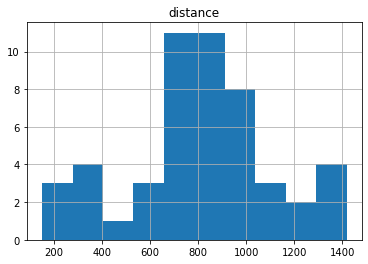

In [152]:
df.hist(column='distance')

Until now, we know most of restaurants are specialized in German cuisine, Breakfast or are not defined properly. Besides that, most of restaurants are between 600 meters and 1000 meters and for our porpoise, we will try to find a closest place. Let's define that the desirable restaurant is under 'German Restaurant' or 'Breakfast' and should be until 600 meters to Brandenburg Gate (the geolocator defined).

In [240]:
df2 = df[(df.categories == 'German Restaurant') | (df.categories == 'Breakfast Spot')]
#df3 = df2[df2.distance <= 600]
#restname= df3.name.values[0]
#print(restname)
df2

#df4 = dataframe[dataframe.name == restname]
#df4
#restlat = df4['location.lat'].values[0]
#restlon = df4['location.lng'].values[0]
#print (restlat, restlon)

,name,categories,address,distance,city
2,Dachgarten-Restaurant,German Restaurant,Platz der Republik 1,282,Berlin
5,Restaurant Coelln,Breakfast Spot,Friedrichstr. 158-164,750,Berlin
7,NH Collection Breakfast Restaurant,Breakfast Spot,Friedrichstr. 96,880,Berlin
13,Restaurant,Breakfast Spot,NaN,1099,Berlin
14,Restaurant Nolle,German Restaurant,Georgenstr. 203,859,Berlin
18,Restaurant im Deutschen Theater,German Restaurant,Schumannstr. 13 A,908,Berlin
24,Restaurant Velis,German Restaurant,Stresemannstr. 99,1165,Berlin
26,Restaurant Aquin,German Restaurant,NaN,1323,Berlin
31,Café Madrid Restaurant,Breakfast Spot,Friedrichstr. 103,911,Berlin
35,Eurostar Berlin breakfast restaurant,Breakfast Spot,NaN,948,Berlin


## 3. Conclusion

Based on the previous result, it is possible to plot a map considering the possible restaurant which are available in the neighborhood (in blue), the Brandenburg Gateplace itself (in red) and the best option considering the tourist requirements (in yellow).

In [175]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map near to Brandenburg Gate

# add a red circle marker to represent the Conrad Hotel
folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='Brandenburg Gate',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):

    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)
    
    folium.features.CircleMarker(
        [restlat, restlon],
        radius=7,
        color='yellow',
        popup=label,
        fill = True,
        fill_color='yellow',
        fill_opacity=0.6
    ).add_to(venues_map)
    
    
# display map
venues_map
